<a href="https://colab.research.google.com/github/annajli/annajli.github.io/blob/master/Estimating_Epidemiological_Dynamic_From_Cross_Sectional_Viral_Load_Distributions_Implementation_and_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation and Review of *Estimating Epidemiological Dynamic From Cross-Sectional Viral Load Distributions*
---
[Paper Link](https://www.medrxiv.org/content/10.1101/2020.10.08.20204222v2.full.pdf)

[Code for Real Data, Simulated Data, Analysis](https://github.com/jameshay218/virosolver_paper)

[Code for MCMC Framework in R](https://github.com/jameshay218/lazymcmc)

# Paper Summary
---
## Main Point
---
During a pandemic, accruate estimation of epidemic growth rates is extremely informative and drives major policies and procedures. In order to measure this growth rate, many use $R_t$ (time-varying effective reprodcutive number) usually based on reverse-transcription quantitative polymerase chain reaction (RT-qPRC) testing. 

### $R_t$ is flawed
---
$$\begin{cases}
\bullet \text{reporting delays} \\
\bullet \text{limited testing capabilities and reliability} \\
\bullet \text{changing test availability}
\end{cases} \implies 
\text{changes in case counts may not accruately reflect depidemic dynamics}
$$
* $R_t$ is calculated using the nubmer of new positives among the tests conducted each day; however this data represents the growth rate of positive tests and not the incidence of infection. 
* Any case count based methods exhibit bias. 
* $R_t$ requires adjustements to account for changes in testing capacity, delay between infection and test report date, and conversion from prevalence to incidence.

### New Method and Contribution
---
1) Demonstrate that population-level changes in distribution of $Ct$ values can arise as epidemiological phenomenon
* $Ct$ (cycle threshold) values measure viral load.
* They argue that $Ct$ values for indicating epidemic decline is better
  * $Ct$ directly maps between the distribution of $Ct$ values and infection incidence $\implies$ $Ct$ based methods are agnostic to changing test rates and provide unbiased growth rate estimates.

2) New Method using $Ct$ values
* New method is not biased and can obtain accurate estimates of epidemic trajectory
* New method uses discarded testing data from single or successive cross-sectional samples for simulation; so it does not require repeat measurements/testing
* Uses population level distribution of $Ct$ values which in many samples indicate a population with predominantly low viral loads. (It has been shown that a systemic incline in distribution of $Ct$ values is correlated with epidemic decline)

## Relationship Between $Ct$ Values and Epidemic Dynamics
---
### Generating $Ct$ Values
---
* First simulate infections values under a deterministic **susceptible-exposed-infectious-recovered (SEIR)** model.
* At selected testing days during the outbreak, simulated $Ct$ values are observed from a random sample of the population using the **Ct distribution model**.
* These simulated samples at time point $t$ recreate realistic cross-sectional distributions of detectable viral loads across the course of an epidemic. 
* Individual $Ct$ values have high uncertainty, so they use population-level observed $Ct$ values.
* $Ct$ distribution becomes estimable function $f$ of times since infection, that is used to estimate epidemic growth rate. 

### Other Considerations
---
* Viral load measurements based on Symptom-based Surveillance is annother idea.
* However there is a distribution of delays between infection date and tests date and confirmation delay $\implies$ time-since-infection distribution of individuals tested based on symptom onset (measure viral load) is influence by stage of the epidemic. 

## Inferring Epidemic Trajetory Using a Single Cross-Section of RT-qPCR Test Results
---
Combines two models:

1) The likelihood of observing a $Ct$ value or negative result | having been infected on a given day
  * Bayesian model and defined priors for the mode and range of $Ct$ values following infection literature

2) The likelihood of being infected on a given day prior to the sample day
  * constant exponential grwoth of infection incidence
    * possible shape of outbreak trajectory is constant growth rate
  * infection using a SEIR model
    * assumes growth rate changes daily depending on remaining number of susceptible individuals

### Step 1: Estimate prevalence and incidence using standard compartmental (SEEIRR) model fit to prevalence at three sampling times

### Step 2: Each sampling time generates $Ct$ samples which gives a distribution (Cross Section)

### Step 3: Fit expontential growth and simple SEIR models using the $Ct$ likelihood of each cross section to get posterior distributions for the epidemic trajectory up to that time point

### Step 4: Evaluate prediction by comparing prediction and data growth rates and prevelant points

<img src="https://drive.google.com/uc?export=view&id=19l0hHkmVW3D2fKyBTA3bSwUAKyHNt5p9">

## Inferring Epidemic Trajectory Using Multiple Cross-Sections
---
* Extend new method to combine data from multiple-cross sections which allows for more reliably estimated epidemic trajectory
* Use this method to recover parameters from SEIR-based simulations
* Compare preformance of $R_t$ estimation using reported case counts with performance of their model when one, two , or three surveillance samples are available with observed $Ct$ values.

### Results
---
* Except when only one sampel is used, $Ct$-based methods fit to an SEIR model exhibit minimal bias
* Reported case count methods exhibit noticeable bias.
* $Ct$ based methods exhibit higher variability.
* All of $Ct$ based methods achieve at least nominal coverage of the 95% credible intervals among 100 simulations.
* Reported case count methods have coverage below 70%. 

## Reconstructing Complex Incidence Curves $Ct$ Values
---
* We want to understand incidence trends usually with sparse data.
* Objective: Reconstruct the entire incidence curve using routinely collected RT-qPRC data.
* Simple epidemic models are effective with relatiely closed populations where epidemic start time is approximately known.
* However epidemics usually follow a more complex trajectory, difficult to model parametrically and doesn't account of non-pharmaceutical interventions unless specified in the model.

### Solution: Use a Gaussian Process to estiamte daily probabilites of infection without making strong assumptions about the epidemic trajectory.

#### First use observed $Ct$ values to esimate the daily growth rate of infections using the SEIR model on single cross-sections

#### Second use multiple cross sections to fit a GP model and estimate full epidemic trajectory by sequentially updating the model with new samples

## Discussion
---
* RT-qPCR $Ct$ values are highly informative of population-level dynamics and can estimate epdiemic growth rates independent of assumptions about the intensity of testing

### Disclaimers on Using $Ct$
---
* Should be cautious when observed $Ct$ values are not from a population census or largely random sample
* Testing is based primarily on the presence of symptoms or follow up contacts of infected individuals which would skew the distribution and not be representative of the population as a whole. 
* Most effective when sureillance samples are obtained independent of COVID-19 symptoms. 
* Different swab types, sample types, instruments. or $Ct$ thresholds may alter the variability of the $Ct$ distribution.

#### How to Improve Results
---
* **choosing a good prior**: setting specific calibrations e.g. based on a reference range of $Ct$ values; using results of a viral kinetics model to inform priors on key parameters when estimating growth rates
* incorporate individual-level features that may affect viral load e.g. symptom status, age, antiviral treatment, etc.
* use multiple types of tests (e.g. antigen and PCR) and reduce uncertainty
* if variant strains are associated with different viral load kinetics and become common, we need to incorporate those as well

#### Limitations of Method
---
* Bayesian framework is highly sensitive to priors and parametric assumptions. If chosen incorrectly, inference may not be reliable.
* Incidence and skewness of $Ct$ distribution become unreliable when there are very few positive cases
  * Fix: use a MCMC algorithm to accurately estimate parameters of prior distribution of a hierarchal model
* May overstate uncertainty in viral load distribution if restuls from different machines are used to inform the prior
  * Fix: underestand why different settings are comparable to better infrom the prior.
*$Ct$ values cannot be relied on for individual-level decision making

# Implementation
---

In [1]:
# initalize tools
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy as sp
import matplotlib.pyplot as plt
from pymc3 import model_to_graphviz, Model

np.random.seed(123)

## Data & Obtaining Prevalence
---
We use the Nursing Home Data that comes from nasopharyngeal speciments processed at the Broad Institute of MIT and Harvard CRSP CLIA labratory. Nursing Home Data is from serial testing serial testing senior nursing facilities.


In [2]:
df = pd.read_csv('nursing_home_data.csv')

In [3]:
df

,location,week,collection_date,result,sampleid,is_nursinghome,RP,N2,N1
0,NH 1,3,2020-04-09,NEG,25087,1,30.012,NaN,NaN
1,NH 1,3,2020-04-09,NEG,25088,1,26.704,NaN,NaN
2,NH 1,3,2020-04-09,POS,25089,1,26.252,34.779,32.655
3,NH 1,3,2020-04-09,POS,25090,1,28.566,31.552,29.834
4,NH 1,3,2020-04-09,NEG,25091,1,24.444,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2141,NH 4,7,2020-05-05,NEG,27190,1,27.544,NaN,NaN
2142,NH 4,7,2020-05-05,POS,27193,1,22.499,31.950,32.353
2143,NH 4,7,2020-05-05,NEG,27196,1,29.209,NaN,NaN
2144,NH 4,7,2020-05-05,NEG,27203,1,25.910,NaN,NaN


In [4]:
# obtain data only for one nursing home
df1 = df.loc[df['location'] == 'NH 1']
df_day_count = df.groupby(['collection_date', 'result']).count()

In [5]:
df_day_count

location  week  sampleid  ...   RP   N2   N1
collection_date result                                  ...               
2020-04-06      NEG                  1     1         1  ...    1    0    0
2020-04-07      NEG                  1     1         1  ...    1    0    0
2020-04-09      INCONCLUSIVE         2     2         2  ...    2    0    2
                NEG                266   266       266  ...  266    0    0
                POS                105   105       105  ...  103  105  105
2020-04-10      NEG                202   202       202  ...  202    0    0
                POS                 87    87        87  ...   87   87   87
2020-04-11      NEG                 57    57        57  ...   57    0    0
                POS                  3     3         3  ...    3    3    3
2020-04-12      NEG                  1     1         1  ...    1    0    0
2020-04-13      NEG                 45    45        45  ...   45    0    0
                POS                 17    17        17  ...   17   17   17
2020-04-14      INCONCLUSIVE         1     1         1  ...    1    1    0
                NEG                  2     2         2  ...    2    0    0
2020-04-16      INCONCLUSIVE         4     4         4  ...    4    4    2
                INVALID              1     1         1  ...    0    0    0
                NEG                274   274       274  ...  274    0    0
                POS                175   175       175  ...  174  175  175
2020-04-17      INCONCLUSIVE         2     2         2  ...    2    2    0
                INVALID              1     1         1  ...    0    0    0
                NEG                154   154       154  ...  154    0    0
                POS                 27    27        27  ...   27   27   27
2020-04-18      NEG                 29    29        29  ...   29    0    0
                POS                  3     3         3  ...    3    3    3
2020-04-29      INCONCLUSIVE         1     1         1  ...    1    0    1
                NEG                 51    51        51  ...   51    0    0
                POS                 10    10        10  ...   10   10   10
2020-05-04      INCONCLUSIVE         7     7         7  ...    7    2    5
                INVALID              4     4         4  ...    0    0    0
                NEG                265   265       265  ...  265    0    0
                POS                 38    38        38  ...   38   38   38
2020-05-05      INCONCLUSIVE         4     4         4  ...    4    1    3
                INVALID              1     1         1  ...    0    0    0
                NEG                273   273       273  ...  273    0    0
                POS                 32    32        32  ...   32   32   32

[35 rows x 7 columns]

In [6]:
# calculates prevelances based on incidence
def calculate_prevs(pos, neg):
  return pos / (pos + neg)

In [7]:
df_day_count = df.groupby(['week', 'result']).count()
results = df_day_count['location']
positives = results[:,'POS'].values
negatives = results[:,'NEG'].values
total_prevs = calculate_prevs(positives, negatives)
total_prevs

array([0.2700831 , 0.30536451, 0.16393443, 0.11513158])

In [8]:
# obtaining prevalence
df1_day_count = df1.groupby(['collection_date', 'result']).count()
# results is a Pandas Series object
results = df1_day_count['location']
positives = results[:,'POS'].values
# negatives don't match up with positives
negatives = results[:, 'NEG'].values[:-1]
prevs = calculate_prevs(positives, negatives)

In [9]:
prevs

array([0.25      , 0.59210526, 0.29411765, 0.51351351, 0.16666667])

In [10]:
# group by day 
df1_day = df1.groupby(['collection_date']).mean()
# drop collection dates that have Nan
df1_day= df1_day.dropna(how="any")
df1_day
# grab collection date
dates = np.array(df1_day.index)
# grab N1s
n1s = np.array(df1_day['N1'])
# grab N2s
n2s = np.array(df1_day['N2'])

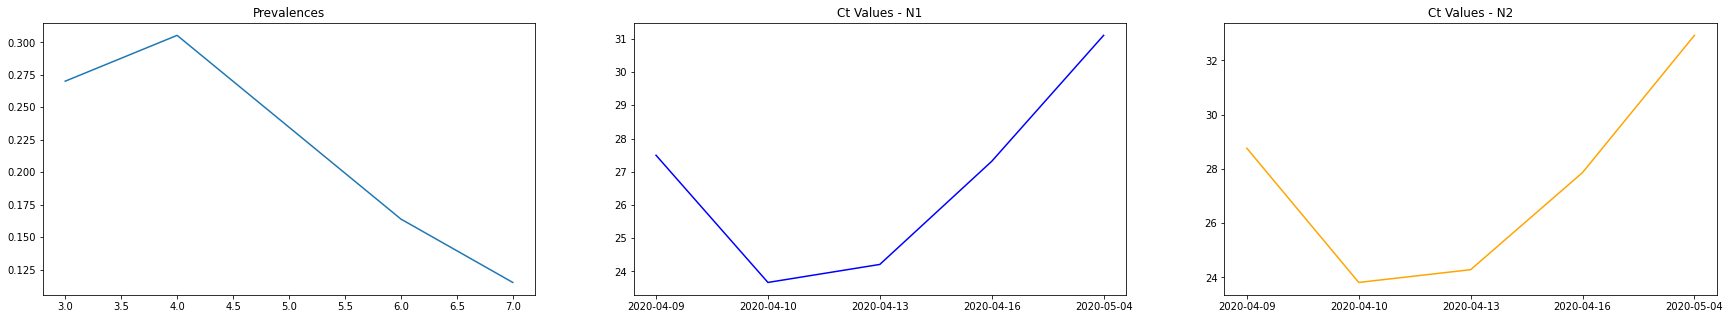

In [11]:
# plots
fig, ax = plt.subplots(1, 3, figsize=(30, 5))
# plot prevalence
ax[0].plot(np.unique(df['week']), total_prevs)
ax[0].set_title("Prevalences")

# plot n1s
ax[1].plot(dates, n1s, color='blue')
ax[1].set_title("Ct Values - N1")

# plot n2s
ax[2].plot(dates, n2s, color='orange')
ax[2].set_title("Ct Values - N2")

plt.show()

## Inferring Epidemic Trajectory Using a Single Cross-Section
---
We model the variation in observed Ct values arising from individual-level viral growth and estimate the distribution of observed Ct values as a function of times since infection. We then use this function to estimate the epidemic growth rate conditional on a set of observed Ct values. 

We are given a single cross-section of RT-qPCR test results. We combine 

1. The likelihood of observing a Ct value on having been infected on a given day

2. The likelihood of being infected on a given date prior to the sample date.

### 1. Ct Value Model
---
The mathematical model that describes the distribution of observed SARS-CoV-2 viral loads over time following infection. They use a parametric model describing the the modal Ct value, $C_{mode}(a)$ for an individual $a$ days after infection.

Since they are interested in a population-level distribution and not individual trajetctories, the put a **Gumbel distribution** prior on the observed $Ct$ values with mean $C_{mode}(a) - \sigma(a)\gamma$, and variance $\frac{\sigma(a)^2\pi^2}{6}$ where $\gamma$ is Euler's constant.

#### Why a Gumbel Distribution?
---
* $f(x; \mu, \beta) = \frac{1}{\beta}e^{-(z + e^{-z})}$ where $z = \frac{x - \mu}{\beta}$.
* used to model the distribution of the maximum or minimum number of samples of various distributions.
* Captures the variation resulting from both swabbing variability and inidividual-level difference in viral kinetics.
* Captures overdispersion of high measured Ct values.
* We write $C(a) \sim Gumbel(C_{mode}(a), \sigma(a))$.

In [12]:
# calculates the modal Ct value according to two-hinge function
# specified on pg.3 of the supplementary material
# init values as specified on pg. 30 of suppementary material
c_zero = 40
c_peak = 20.06
c_switch = 33.0
t_eclipse = 0.0
# global limit of detection variable
c_LOD = 40.0
t_peak = 5.0
t_switch = 9.38
# limit of detection
t_LOD = 99999999
# daily probability of individual fully cleraing virus
# and becoming undectable
p_addl = 0.11

def calculate_c_mode(a):
  # undetectable true value
  if (a <= t_eclipse):
    return c_zero
  # log viral load increases
  elif (t_eclipse < a and a <= t_eclipse + t_peak):
    return c_zero + (c_peak - c_zero)/(t_peak) * (a - t_eclipse)
  # log viral load wanes
  elif (t_eclipse + t_peak < a and a <= t_eclipse + t_peak + t_switch):
    return c_peak + (c_switch - c_peak)/(t_switch) * (a - t_eclipse - t_peak)
  # log viral load wanes at a slower linear rate
  else:
    return c_switch + (c_LOD - c_switch)/(t_LOD - t_switch - t_peak - t_eclipse) * (a - t_eclipse - t_peak - t_switch)

In [13]:
# calculates scale parameter sigma_a
# init values
sigma_obs = 5.15
s_mod = 0.4
t_mod = 14.0

def calculate_sigma(a):
  if (a < t_eclipse + t_peak + t_switch):
    return sigma_obs
  elif (t_eclipse + t_peak + t_switch <= a and a < t_eclipse + t_peak + t_switch + t_mod):
    return sigma_obs * (1 - ((1 - s_mod)/t_mod) * (a - t_eclipse - t_peak - t_switch))
  else:
    return sigma_obs * s_mod

In [104]:
# samples C(a)
def sample_C(a, no_variance=True):
  mode = calculate_c_mode(a)
  if (no_variance):
    sigma = 0
  else:
    sigma = calculate_sigma(a)
  mean = mode - sigma * np.exp(1)
  variance = (sigma**2 * np.pi**2) / 6
  return sp.stats.gumbel_r.rvs(mean, variance)

In [105]:
def gumbel_pdf(x, mean, variance):
  y = (x - mean) / variance
  pdf = np.exp(-(y + np.exp(-y)))
  return pdf / variance

# pdf of gumbel ct distribution
# p_a is a function calculating the probability that an individuals Ct value is X_i at day t - a
# we don't use the SCIPY package sp.stats.gumbel_r.pdf(x, mean, variance) because it won't
# work with Pymc3
def p_a(a, x):
  mode = calculate_c_mode(a)
  sigma = calculate_sigma(a)
  mean = mode - sigma * np.exp(1)
  variance = (sigma**2 * np.pi**2) / 6
  
  return gumbel_pdf(x, mean, variance)

# cdf of gumbel ct distribution
def cdf_a(a):
  mean = calculate_c_mode(a)
  variance = calculate_sigma(a)
  return sp.stats.gumbel_r.cdf(a, mean, variance)

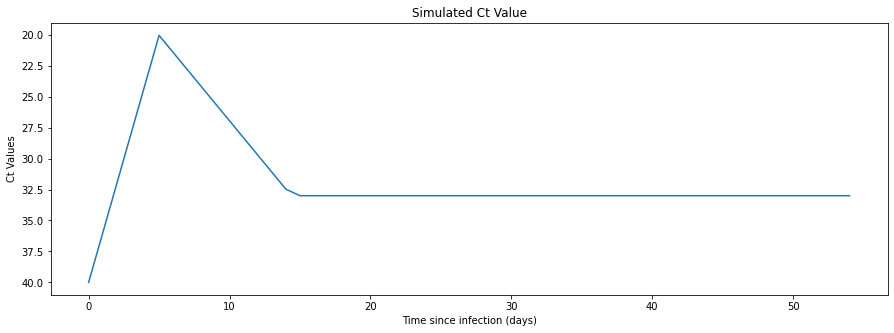

In [106]:
# visual sanity check for Ct simulations
# calculate
xs = np.array(range(55))
cts = np.array([sample_C(x) for x in xs])

# plots
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# plot prevalence
ax.plot(xs, cts)
ax.set_xlabel("Time since infection (days)")
ax.set_ylabel("Ct Values")
ax.set_title("Simulated Ct Value")
# inverts axis
plt.gca().invert_yaxis()

plt.show()

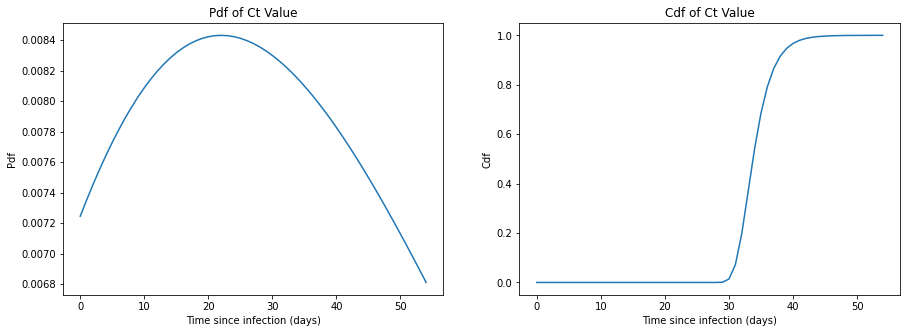

In [107]:
# visual sanity check for Ct simulations
# calculate
xs = np.array(range(55))
pdfs = np.array([p_a(1, x) for x in xs])
cdfs = np.array([cdf_a(a) for a in xs])

# plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# plot pdf
ax[0].plot(xs, pdfs)
ax[0].set_xlabel("Time since infection (days)")
ax[0].set_ylabel("Pdf")
ax[0].set_title("Pdf of Ct Value")
# plot cdf
ax[1].plot(xs, cdfs)
ax[1].set_xlabel("Time since infection (days)")
ax[1].set_ylabel("Cdf")
ax[1].set_title("Cdf of Ct Value")

plt.show()

### Likelihood of Daily Probability of Infection
---
For testing day $t$: let $\pi_{t - a} := $probability that a randomly-selected individual in the population was infected on day $t - a$.

Therefore, let $\pi_{t - A_{max}},...,\pi_{t - 1}$ be the daily probabilities of infection for the whole population for $A_{max}$ days to 1 day prior to testing day $t$.

Let $p_a(x) :=$ probability that the Ct value is $x$ for a test conducted $a$ days after infection. 

Let $\phi_a :=$ probability of a Ct value being detectable $a$ days after infection.

Let PCR test results from a sample of $n$ individuals be recorded $X_1,...,X_n$.

Then, for $x_i \leq C_{LOD}$ (a detectable Ct value): 

**The probability of individual $i$ having Ct value $x_i$** is:

$$
P(X_i = x_i | \pi_{t - A_{max}},..,\pi_{t - 1}) = \sum_{a = 1}^{A_{max}} p_a(x_i)\pi_{t - a}
$$

(a sum of days before test of probability of having Ct value on day $t - a$ and probability of being infected on day $t - a$)

**The probability of a randomly-chosen individual being detectable to PCR on testing day $t$** is:

$$
P(X_i \leq C_{LOD} | \pi_{t - A_{max}},..,\pi_{t - 1}) = \sum_{a = 1}^{A_{max}} \phi_a\pi_{t - a}
$$

**The likelihood for the $n$ PCR values** is:

$$
\mathcal{L}(\pi_{t - A_{max}},...,\pi_{t - a} | X_1,...,X_n) = \prod_{i = 1}^n \bigg[ \bigg(\sum_{a = 1}^{A_{max}} p_a(X_i)\pi_{t - a}\bigg)^{\mathbb{I}(X_i \leq C_{LOD})} \bigg( 1 - \sum_{a = 1}^{A_{max}}\phi_a\pi_{t - a}\bigg)^{\mathbb{I}(X_i > C_{LOD})} \bigg]
$$

This is the probability that data point $i$ has detectable Ct value $X_i$ if they are detectable or probability of being not detectable if not detectable, for all data points.

This likelihood can be maximized to get nonparametric estimates of the daily probability of infection with constraint $\sum_{a = 1}^{A_{max}} \pi_{t - a} \leq 1$

### 2. Epidemic Growth Rate Estimator
---
To improve the interpretability of the stimates, they consider the following parametric models.

#### Exponential Growth Model
---
* Assumes constant growth rate.
* $\pi_{t - a} = \pi_0\exp[\beta(t - a)]$ where $\beta$ is the growth rate.
* We assume all Ct values are detectable:
* $\implies \mathcal{L}(\beta | X_1,...,X_n) = \frac{\prod_{i = 1}^n (\sum_{a = 1}^{A_{max}} p_a(X_i)\phi_a\exp[\beta(t - a)])}{( \sum_{a = 1}^{A_{max}}\phi_a\exp[\beta(t - a)])^n}$
Since the likelihood can easily lead to overflow values, we use log-likelihood which is more stable. Using the log-likelihood does not disrupt the optimization problem because log is monotonic.
$$\implies \mathcal{l}(\beta | X_1,...,X_n) = \log \mathcal{L}$$
$$ = \sum_{i = 1}^n \log (\sum_{a = 1}^{A_{max}} p_a(X_i)\phi_a\exp[\beta(t - a)]) - n \log( \sum_{a = 1}^{A_{max}}\phi_a\exp[\beta(t - a)])$$

(ignoring $\pi_0$)
* Assume a prior on $\beta$, namely $\beta \sim \mathcal{N}(0, 0.25)$ and along with the likelihood, sample from the posterior distribution using MCMC.
* $p_a(X_i)$ is the probability of observing Ct value of $X_i$ given that user $i$ was infected $a$ days ago. This means $i$ must be detectable. This is why the inner value on the numerator is $p_a(X_i)\phi_a\exp[\beta(t - a)]$ and not $p_a(X_i)\exp[\beta(t - a)]$

#### Code for Likelihood Function
---

In [76]:
# some constants
t = 35
A_max = 35

In [77]:
# phi_a is a function calculating the probability that a Ct value is detectable a days after infection
def phi_a(a):
  prob_ca_leq_clod = cdf_a(c_LOD)
  if (a <= t_eclipse + t_peak + t_switch):
    return prob_ca_leq_clod
  else:
    return prob_ca_leq_clod * (1 - p_addl) ** (a - t_eclipse - t_peak - t_switch)

In [117]:
phi_a(9)

0.9671147114112951

In [79]:
# x is a single data point
# A_max is the maximum number of days before test day that we consider
# beta is the growth rate parameter
# t is test day
def calculate_prob(x, A_max, beta, t):
  result = 0
  for a in range(A_max):
    result += p_a(a, x) * phi_a(a) * np.exp(beta * (t - a))
  return result

# beta is the growth rate parameter
# A_max is the maximum number of days before test day that we consider
# t is test day
def calculate_detectable_prob(A_max, beta, t):
  result = 0
  for a in range(A_max):
    result += phi_a(a) * np.exp(beta * (t - a))
  return result

In [80]:
def compute_exp_growth_log_likelihood(beta, X, test_time):
  logprob = np.log(calculate_detectable_prob(A_max, beta, test_time))
  n = X.size
  sum = pm.math.sum(np.log(calculate_prob(X, A_max, beta, test_time)))
  return sum - n * logprob 

#### Code for Prior and Posterior
---

In [81]:
def build_exponential_model_with_observed(observed_cts, test_time):
  exponential_infection_model = pm.Model()

  with Model() as exponential_infection_model:
    # priors on beta
    # beta is a univariate normal
    beta = pm.Normal('beta', mu=0, sigma=0.25)
    # likelihood of exponential growth model:
    # the likelihood of observing these Ct values 
    exponential_growth_likelihood = lambda X: compute_exp_growth_log_likelihood(beta, X, test_time)
    # # fake likelihood for test
    # y_obs = pm.Poisson('y', mu=beta, observed=first_week_nh1_cts)
    X_obs = pm.DensityDist('likelihood', exponential_growth_likelihood, observed=observed_cts)

  return exponential_infection_model

In [82]:
# draw graphical model for the thing we just defined  
def draw_model(pymc3_model):
  model_to_graphviz(pymc3_model)

In [83]:
# sample n samples from the posterior of the model, using tune_iters iterations to tune the sampler
# the default sampler for pymc3 is a type of MCMC sampler called No-U-turn HMC
def sample_with_exponential_model(model, n=2000, tune_iters=2000):
  with model:
    #using default sampler
    trace = pm.sample(n, tune=tune_iters, cores=4, chains=6, init='advi+adapt_diag')
  return trace

In [84]:
# return posterior mean and samples
def burn_and_thin_posterior_samples(trace):
  # defined burn-in
  burn_in = .1
  # define thinning
  thin = 2
  # N
  N = len(trace['beta'])
  # samples from posterior
  beta_posterior_samples = trace['beta'][int(burn_in * N)::thin]
  beta_posterior_mean = np.mean(beta_posterior_samples, axis=0)
  return beta_posterior_mean, beta_posterior_samples

In [85]:
# plots traceplots for beta as a sanity check
def plot_trace(beta_posterior_samples):
  fig, ax = plt.subplots(1, 1, figsize=(10, 5))
  ax.plot(range(len(beta_posterior_samples)), beta_posterior_samples, color='orange', alpha=0.5)
  ax.set_title('trace plot for beta')

  plt.show()

### Nursing Home Data for Exponential Growth Model
---

In [29]:
# one cross section of Ct values from NH 1
first_week_nh1_cts = np.array(df1.loc[df1['collection_date'] == '2020-04-10']['N1'].dropna(how="any"))

In [30]:
exp_model_nh1 = build_exponential_model_with_observed(first_week_nh1_cts)
trace_nh1 = sample_with_exponential_model(exp_model_nh1, n=2000, tune_iters=2000)
posterior_mean_nh1, posterior_samples_nh1 = burn_and_thin_posterior_samples(trace_nh1)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 177.07:   5%|▌         | 10041/200000 [00:11<03:40, 862.35it/s]
Convergence achieved at 10100
Interrupted at 10,099 [5%]: Average Loss = 217.51
Multiprocess sampling (6 chains in 4 jobs)
NUTS: [beta]
Sampling 6 chains: 100%|██████████| 24000/24000 [00:24<00:00, 963.02draws/s]


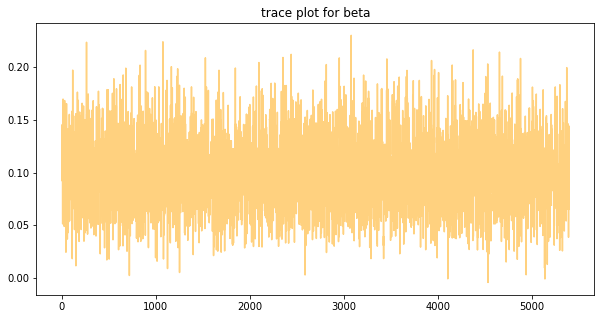

In [31]:
plot_trace(posterior_samples_nh1)

In [33]:
print(posterior_mean_nh1)

0.09991428594035123


### Simulated Data 0 for Exponential Growth Model
---

In [86]:
df_sim0 = pd.read_csv('Simulation__cts.csv')
test_times = df_sim0['t'].unique()

In [87]:
test_times

array([ 55,  69,  83,  97, 111, 125, 139, 153])

In [92]:
sim0_means = []
sim0_samples = []
for time in test_times:
  cts = np.array(df_sim0.loc[df_sim0['t'] == time]['ct'])
  exp_model_sim0 = build_exponential_model_with_observed(cts, time)
  trace_sim0 = sample_with_exponential_model(exp_model_sim0, n=2000, tune_iters=3000)
  posterior_mean_sim0, posterior_samples_sim0 = burn_and_thin_posterior_samples(trace_sim0)
  sim0_means.append(posterior_mean_sim0)
  sim0_samples.append(posterior_samples_sim0)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 8,562.7:   1%|          | 1895/200000 [00:03<05:15, 627.07it/s]
Convergence achieved at 1900
Interrupted at 1,899 [0%]: Average Loss = 8,631.9
Multiprocess sampling (6 chains in 4 jobs)
NUTS: [beta]
Sampling 6 chains: 100%|██████████| 30000/30000 [01:07<00:00, 442.96draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7082994262406568, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 7,741.5:   3%|▎         | 6356/200000 [00:10<05:32

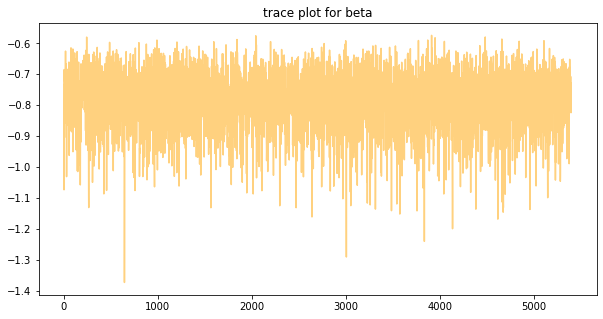

In [93]:
plot_trace(sim0_samples[5])

In [94]:
sim0_means

[-0.19233286422345583,
 -0.7852690436510217,
 -0.7978524949978629,
 -0.818158272799223,
 -0.8057920865764842,
 -0.788724208218063,
 -0.7812655346455265,
 -0.7814956744559138]

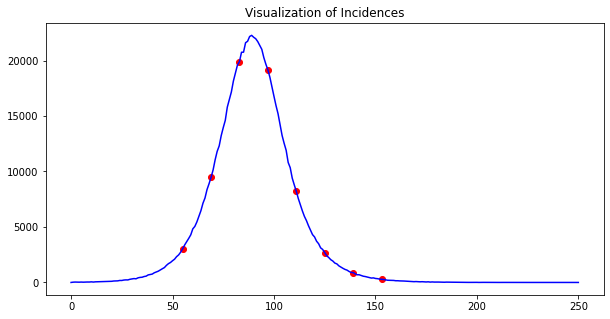

In [69]:
df_sim0_seir_outpus = pd.read_csv("Simulation__seir_outputs.csv")
sim0_incs = np.array(df_sim0_seir_outpus["inc"])

# visualize results
fig, ax = plt.subplots(1, 1, figsize=(10, 5)) # make a figure with one row and one column of size 10x5

# Plot the prior samples
ax.plot(np.arange(len(sim0_incs)), sim0_incs, color='blue')
# Plot test times
ax.scatter(test_times, sim0_incs[test_times], color='red')

ax.set_title('Visualization of Incidences')

plt.show() # display the figure

In [70]:
def daily_growth_rate(inc_t, inc_t1):
  return np.log(inc_t1 / inc_t)

In [71]:
true_rates = []
# calculates true growth rate value from simulation outputs
for time in test_times:
  # calculate average growth rate
  # look at average growth rate in the 35-day period
  current_growth_rate = np.mean([daily_growth_rate(sim0_incs[time - i], sim0_incs[time]) for i in range(1, 36)])
  true_rates.append(current_growth_rate)

In [72]:
true_rates

[1.661898144361474,
 1.5142781269146122,
 1.1150064282014582,
 0.28203806393090125,
 -0.7244587056938885,
 -1.3005068949603493,
 -1.4047082381428428,
 -1.441386824077808]

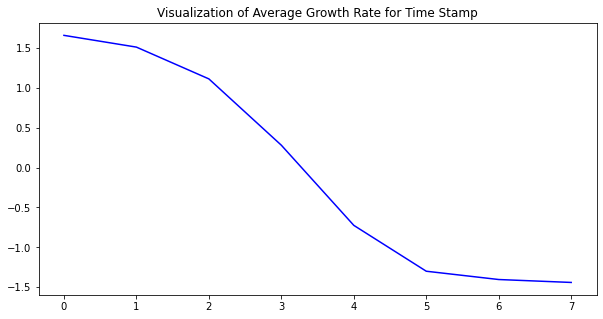

In [57]:
# visualize results
fig, ax = plt.subplots(1, 1, figsize=(10, 5)) # make a figure with one row and one column of size 10x5

# Plot the prior samples
ax.plot(np.arange(len(true_rates)), true_rates, color='blue')

ax.set_title('Visualization of Average Growth Rate for Time Stamp')

plt.show() # display the figure

#### SEIR Model
---
* Assumes growth rate changes daily depending on the remaining number of susceptible individuals 

ANNA TODO:
* https://github.com/pargaw/cs288project/tree/main/virosolver_paper/data/ONS_sim
* use Scenario 1 (out of state travel) and Scenario 2 (temporal e.g. college town)
* run on exponential growth model and SEIR model